# references:

Detector Dead Time Determination and Optimal Counting Rate for a Detector Near a Spallation Source or a Subcritical Multiplying System

https://downloads.hindawi.com/journals/stni/2012/240693.pdf

https://phyusdb.files.wordpress.com/2013/03/radiationdetectionandmeasurementbyknoll.pdf

supposing the signal linearly depends on a quantity ($I$) such as time or power.
$$
N = k I
$$
than, if there is a death time ($\tau$)
$$
N = M (1+M\tau)
$$
and so
$$
y = \frac{N}{kM} = \frac{I}{M} = \frac{1}{k} + \frac{\tau}{k}M
$$
with a linear fit we can estimate $\tau$. Or also with a quadratic fit
$$
I = \frac{1}{k}M + \frac{\tau}{k}M^2 \ \ \Rightarrow \ \ \tau M^2 + M - Ik = 0
$$
so
$$
M = \frac{-1 \pm \sqrt{1 + 4 kI \tau }}{2\tau}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
def find_death_time(I_data, M_data):

    def lin_fit_func(M, k, tau):
        return 1/k + tau/k * M

    def sqrt_fit_func(I, k, tau):
        return ((1+4*k*I*tau)**(1/2)-1)/(2*tau)

    def quad_fit_func(M, k, tau):
        return M/k + tau/k * M**2

    y_data = [I_data[i]/M_data[i] for i in range(len(M_data))]

    ################################## quadratic
    result_quad, cov = curve_fit(quad_fit_func, M_data, I_data, p0=[1, 1])
    print("quad=", result_quad)

    Ms = np.linspace(min(M_data), max(M_data), 100)

    Is = quad_fit_func(Ms, *result_quad)
    plt.plot(Is,Ms,label="quad")

    ################################## linear
    result_lin, cov = curve_fit(lin_fit_func, M_data, y_data, p0=[1,1])
    print("lin=", result_lin)

    Ms = np.linspace(min(M_data), max(M_data),100)
    Y = lin_fit_func(Ms, result_lin[0], result_lin[1])
    Is_ = [Y[i]*Ms[i] for i in range(len(Ms))]
    plt.plot(Is_,Ms,label="lin")

    ################################## sqrt
    result_sq, cov = curve_fit(sqrt_fit_func, I_data, M_data, p0=[1,1])
    print("sqrt=", result_sq)

    Is = np.linspace(min(I_data), max(I_data),100)
    Ms = [sqrt_fit_func(I, *result_sq) for I in Is]
    plt.plot(Is,Ms,label="sqrt")

    plt.plot(I_data, M_data, "o")

    plt.legend()
    plt.show()

    return

quad= [1.79611761 0.03458749]
lin= [1.27761365 0.01627662]
sqrt= [1.77907165 0.03442496]


/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_10851/681333186.py:7: RuntimeWarning: invalid value encountered in sqrt
  return ((1+4*k*I*tau)**(1/2)-1)/(2*tau)


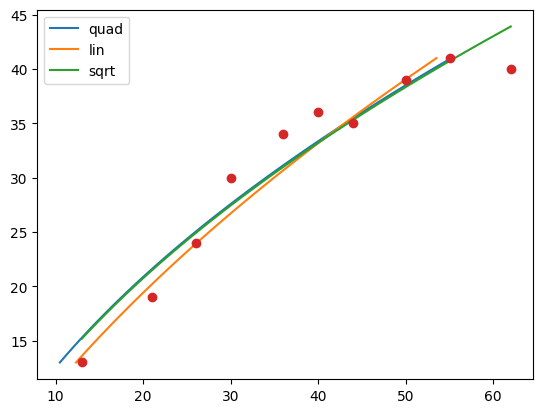

In [8]:
M_data = [13, 19, 24, 30, 34, 36, 35, 39, 41, 40]
I_data = [13, 21, 26, 30, 36, 40, 44, 50, 55, 62]

find_death_time(I_data, M_data)

quad= [0.24201784 0.02266185]
lin= [0.27148812 0.03513461]
sqrt= [0.24737529 0.02517249]


/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_10851/681333186.py:7: RuntimeWarning: invalid value encountered in sqrt
  return ((1+4*k*I*tau)**(1/2)-1)/(2*tau)


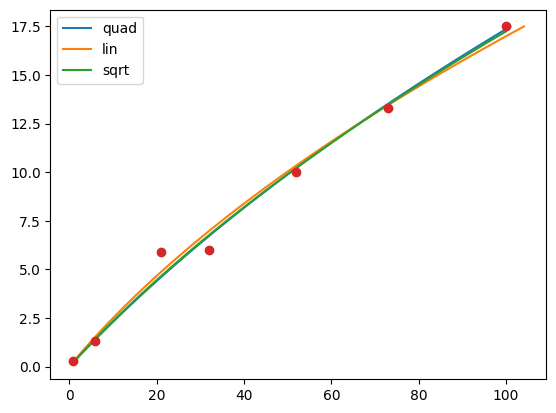

In [9]:
name = "dati_power_1.txt"

M_data = []
I_data = []

data = open(name, "r")
for i, row in enumerate(data):
    row = row.replace("\n", "")
    terms = row.split("\t")
    terms = list(map(float, terms))

    I_data.append(terms[0])
    M_data.append(terms[1])

find_death_time(I_data, M_data)